Created by Daniela Rigoli on December 18 2024

Based on Machine Learning Model for Diabetes Prediction
Using Parallel Computing: Comparative Study article

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    accuracy_score, recall_score, f1_score, precision_score, roc_curve, roc_auc_score,
    confusion_matrix, classification_report, mean_squared_error
)
from joblib import parallel_backend

In [3]:
# Load the Diabetes Dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
columns = diabetes.feature_names

# Convert to DataFrame for exploratory analysis
df = pd.DataFrame(X, columns=columns)
df['target'] = y


In [4]:
# Exploratory Analysis
print("Data Information:")
df.info()
print("\nData Description:")
print(df.describe())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB

Data Description:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01

In [5]:
# Identify numerical and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Numerical Columns: {numerical_columns}")
print(f"Categorical Columns: {categorical_columns}")

Numerical Columns: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']
Categorical Columns: []


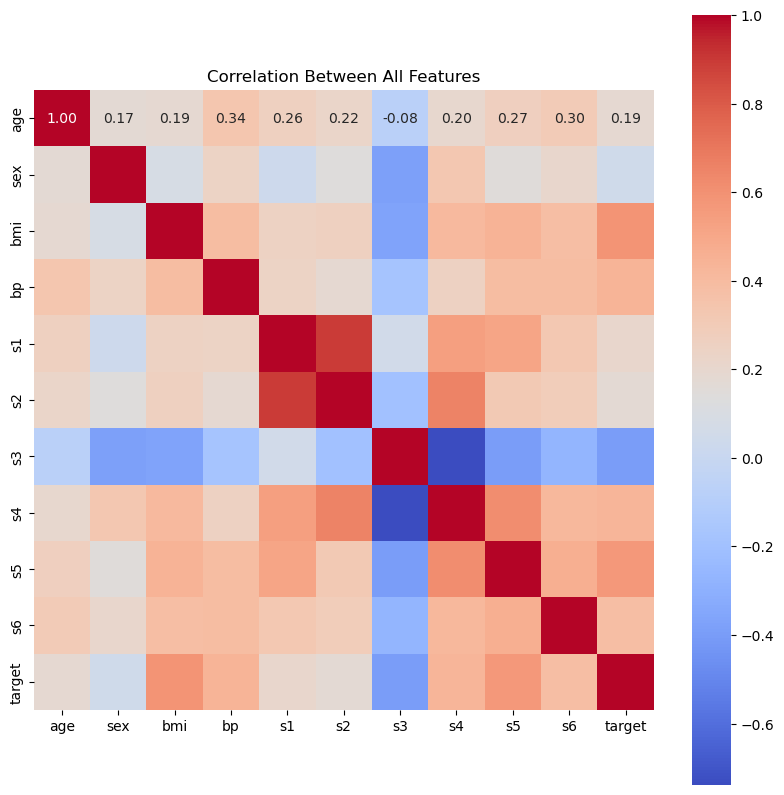

In [6]:
all_columns =  numerical_columns + categorical_columns
df_copy = df.copy()
plt.figure(figsize=(10, 10))
pairs = df_copy[all_columns]
pairs[categorical_columns] = pairs[categorical_columns].apply(lambda x: pd.factorize(x)[0])# Encode categories numerically
correlation = pairs.corr()
sns.heatmap(correlation, annot=True, square=True,cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between All Features")
plt.show()

Criar Gráfico Chi-Quadrado para Atributos Categóricos? informação mútua para obter a informação de dependência geral (linear e não linear)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
dt_model = DecisionTreeRegressor(random_state=42)
lr_model = LinearRegression()

In [35]:
# Measure training time
start_time = time.time()

# Parallel training with threading backend
with parallel_backend('threading', n_jobs=1):
    dt_model.fit(X_train, y_train)

end_time = time.time()
print(f"Training Time for Desion Tree: {end_time - start_time:.2f} seconds")

Training Time for Desion Tree: 0.03 seconds


In [13]:
# Measure training time
start_time = time.time()

# Parallel training with threading backend
with parallel_backend('threading', n_jobs=1):
    lr_model.fit(X_train, y_train)

end_time = time.time()
print(f"Training Time for Linear Regression: {end_time - start_time:.2f} seconds")

Training Time for Linear Regression: 0.01 seconds


In [36]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nEvaluation Report for {model_name}:")
    accuracy = accuracy_score(y_true, (y_pred < 0.5).astype(int)) if len(set(y_true)) == 2 else "N/A"
    recall = recall_score(y_true, (y_pred < 0.5).astype(int), zero_division=1) if len(set(y_true)) == 2 else "N/A"
    f1 = f1_score(y_true, (y_pred < 0.5).astype(int), zero_division=1) if len(set(y_true)) == 2 else "N/A"
    precision = precision_score(y_true, (y_pred < 0.5).astype(int), zero_division=1) if len(set(y_true)) == 2 else "N/A"
    roc_auc = roc_auc_score(y_true, y_pred) if len(set(y_true)) == 2 else "N/A"
    conf_matrix = confusion_matrix(y_true, (y_pred < 0.5).astype(int)) if len(set(y_true)) == 2 else "N/A"
    class_report = classification_report(y_true, (y_pred < 0.5).astype(int), zero_division=1) if len(set(y_true)) == 2 else "N/A"

    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"ROC AUC: {roc_auc}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred):.2f}")


In [37]:
# Make predictions
dt_predictions = dt_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Model Evaluation
evaluate_model(y_test, dt_predictions, "Decision Tree")
evaluate_model(y_test, lr_predictions, "Linear Regression")

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
confusion_matrix(y_test, dt_predictions)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)